In [ ]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from AAADevsList import aaa_developers_2000s, aaa_developers_2010s

In [26]:
file_path = r"C:\Users\Andrew\Documents\CSC369\AnalysisProject\FinalBaseDataset.parquet"
initalGamesDataset = pl.read_parquet(file_path)

file_paths = [
    "C:\\Users\\Andrew\\Documents\\CSC369\\AnalysisProject\\InitialPreprocessingEDA\\games_with_release_years_4.csv",
    "C:\\Users\\Andrew\\Documents\\CSC369\\AnalysisProject\\InitialPreprocessingEDA\\games_with_release_years_3.csv",
    "C:\\Users\\Andrew\\Documents\\CSC369\\AnalysisProject\\InitialPreprocessingEDA\\games_with_release_years_2.csv",
    "C:\\Users\\Andrew\\Documents\\CSC369\\AnalysisProject\\InitialPreprocessingEDA\\games_release_years_1.csv"
]

dfs = [pl.read_csv(path) for path in file_paths]
combined_df = dfs[0]
for df in dfs[1:]:
    combined_df = combined_df.vstack(df)


result_df = combined_df.join(initalGamesDataset, on="game", how="inner")

print(result_df.shape)

dataset_2000sAAA = result_df.filter(
    (result_df["Developers"].is_in(aaa_developers_2000s) | result_df["Publishers"].is_in(aaa_developers_2000s)) &
    (result_df["Release Year"] >= 2000) & (result_df["Release Year"] <= 2009)
)

dataset_2010sAAA = result_df.filter(
    (result_df["Developers"].is_in(aaa_developers_2010s) | result_df["Publishers"].is_in(aaa_developers_2010s)) &
    (result_df["Release Year"] >= 2010)
)

print("2000s AAA Games:", dataset_2000sAAA.shape)
print("2010s AAA Games:", dataset_2010sAAA.shape)


(9005286, 14)
2000s AAA Games: (831571, 14)
2010s AAA Games: (7340910, 14)


In [34]:
result_df.n_unique(['Developers'])

103

C:\Users\Andrew\AppData\Local\Temp\ipykernel_32976\1560181864.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Dataset', y='Mean Voted Up', data=mean_comparison_df.to_pandas(), palette="viridis")


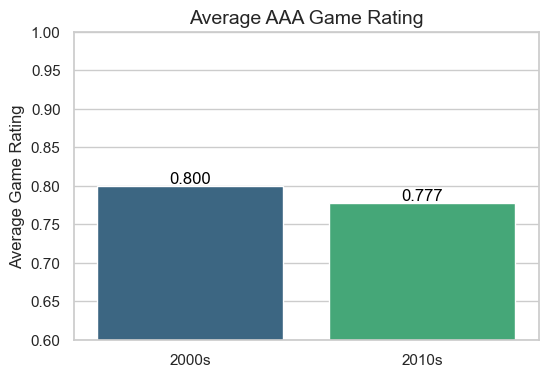

C:\Users\Andrew\AppData\Local\Temp\ipykernel_32976\1560181864.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Release Year', y='Mean Voted Up', data=mean_voted_up_by_year_2000s.to_pandas(), palette="Blues_d")


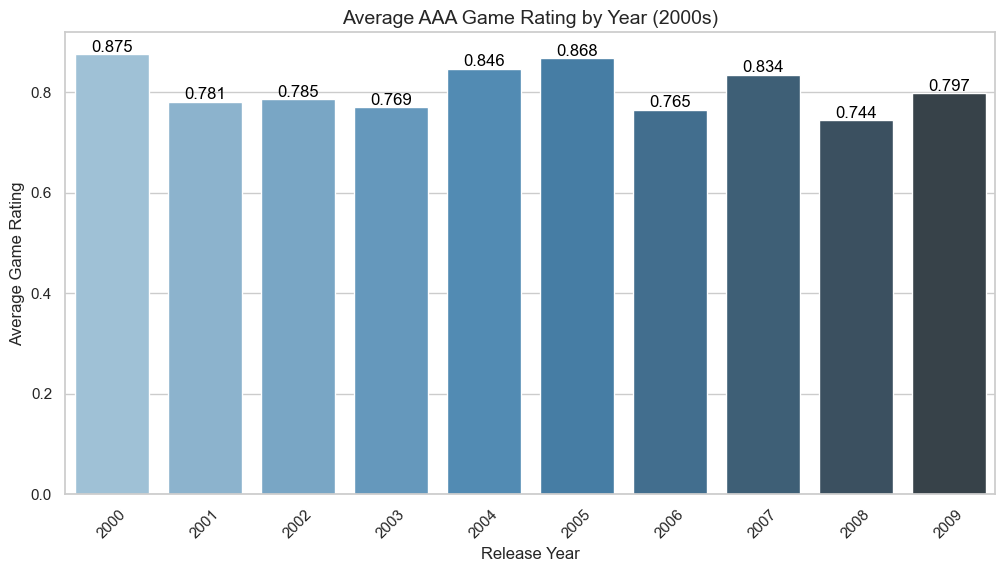

C:\Users\Andrew\AppData\Local\Temp\ipykernel_32976\1560181864.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Release Year', y='Mean Voted Up', data=mean_voted_up_by_year_2010s.to_pandas(), palette="Greens_d")


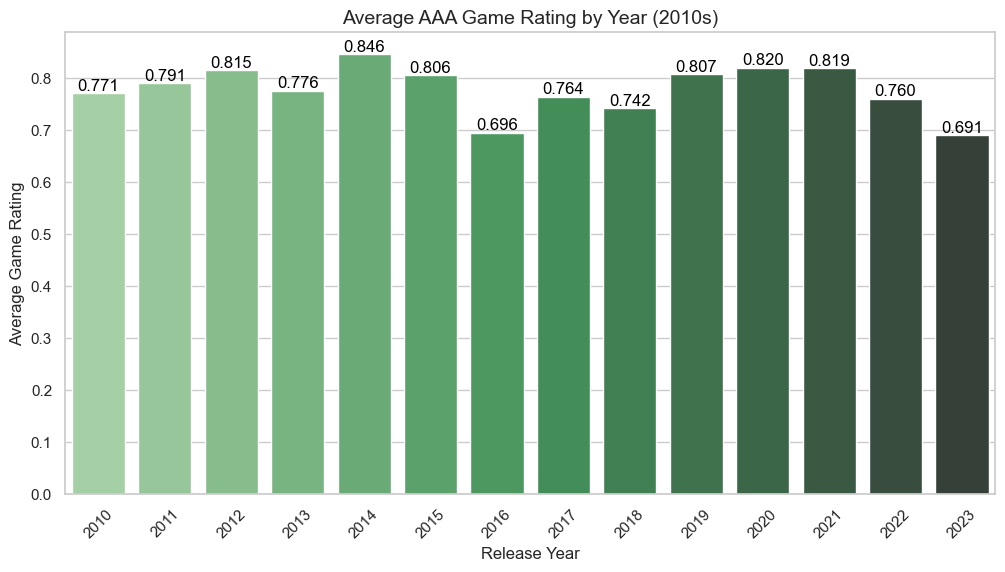

In [32]:
sns.set(style="whitegrid")

aggregated_df = result_df.group_by(['Release Year', 'game']).agg(pl.col('voted_up').mean().alias('Mean Voted Up'))

mean_voted_up_by_year_aggregated = aggregated_df.group_by('Release Year').agg(pl.col('Mean Voted Up').mean().alias('Mean Voted Up'))

mean_voted_up_2000s_per_game = dataset_2000sAAA.group_by('game').agg(pl.col('voted_up').mean().alias('Mean Voted Up'))
mean_voted_up_2010s_per_game = dataset_2010sAAA.group_by('game').agg(pl.col('voted_up').mean().alias('Mean Voted Up'))

mean_voted_up_2000s = mean_voted_up_2000s_per_game['Mean Voted Up'].mean()
mean_voted_up_2010s = mean_voted_up_2010s_per_game['Mean Voted Up'].mean()

mean_comparison = {
    'Dataset': ['2000s', '2010s'],
    'Mean Voted Up': [mean_voted_up_2000s, mean_voted_up_2010s]
}
mean_comparison_df = pl.DataFrame(mean_comparison)

plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Dataset', y='Mean Voted Up', data=mean_comparison_df.to_pandas(), palette="viridis")
plt.title('Average AAA Game Rating', fontsize=14)
plt.ylabel('Average Game Rating')
plt.xlabel('')
plt.ylim(0.6, 1)  

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

mean_voted_up_by_year_2000s = mean_voted_up_by_year_aggregated.filter(
    mean_voted_up_by_year_aggregated["Release Year"].is_between(2000, 2009)
)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Release Year', y='Mean Voted Up', data=mean_voted_up_by_year_2000s.to_pandas(), palette="Blues_d")
plt.title('Average AAA Game Rating by Year (2000s)', fontsize=14)
plt.ylabel('Average Game Rating')
plt.xlabel('Release Year')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

mean_voted_up_by_year_2010s = mean_voted_up_by_year_aggregated.filter(
    mean_voted_up_by_year_aggregated["Release Year"] >= 2010
)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Release Year', y='Mean Voted Up', data=mean_voted_up_by_year_2010s.to_pandas(), palette="Greens_d")
plt.title('Average AAA Game Rating by Year (2010s)', fontsize=14)
plt.ylabel('Average Game Rating')
plt.xlabel('Release Year')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()